# Introduction to APIs

### **1. What is an API?**

**Definition**:  
An API is a set of **rules that allows one application to interact with another.** It defines the methods and data formats that programs should use to communicate with each other.

- **Acronym**: API stands for "Application Programming Interface."
- **Purpose**: It acts like a messenger, taking a request from a user or system, sending it to another system, and then returning the response.

#### **Real-World Example:**
- Think of an API as a waiter in a restaurant. The waiter takes your order (request), delivers it to the kitchen (server), and brings back your food (response). You don’t need to know how the kitchen works; you just use the waiter (API) to get what you want. 
- You can also think of an API like a USB cable that connects a laptop to a phone, allowing them to communicate and exchange data.

### **2. Types of APIs**

There are various types of APIs, but we will focus on **Web APIs**, which allow applications to communicate over the web.

- **Web APIs: Web APIs allow communication between servers and clients over the internet using HTTP/HTTPS (HyperText Transfer Protocol/ HyperText Transfer Protocol Secure).** They often return data in formats like JSON or XML. (HTTP/HTTPS are the protocols or rules used by Web APIs to communicate over the internet. Most modern Web APIs use HTTPS to ensure secure data transfer.)
Example: RESTful APIs, GraphQL, SOAP.
  
  **Use Case**: When you use a weather app that shows data from a weather service, the app is using an API to fetch the data from a website.
        
___
Other types of API include: Operating System APIs, Hardware APIs, Database APIs etc

### **3. Key Terms**

1. **Request**: When you ask an API for information or services. This request is made through a URL (Uniform Resource Locator).
   
   **Example**: When you type a website URL into your browser, that’s a request.

2. **Response**: The data returned by the API based on your request.
   
   **Example**: When the website loads, that’s the response from the server.

3. **Endpoints**: The specific part of an API where you send your requests. (the particular webpage in the website that you're requesting for).

4. **HTTP Methods**:
   - **GET**: Retrieves data.
   - **POST**: Sends data to create/update resources.
   - **PUT**: Updates existing resources.
   - **DELETE**: Deletes resources.

### **4. What Makes an API Request?**

A request is made using:

1. **URL**: The endpoint to send your request to.
2. **HTTP Method**: Defines the type of request (GET, POST, etc.).
3. **Headers**: Additional information sent along with the request (e.g., authentication tokens).
4. **Body**: The actual data you’re sending (used mostly with POST and PUT).

### **5. API Response Format**

APIs commonly return data in the following formats:
- **JSON (JavaScript Object Notation)**: Lightweight and easy to read.
- **XML (eXtensible Markup Language)**: More structured but less commonly used than JSON.

**Example of JSON**:
```json
{
  "location": "Lagos",
  "temperature": 32,
  "condition": "Sunny"
}
```

### **6. Tools for Working with APIs**

- **Postman**: A popular tool to manually test APIs by sending requests and viewing responses.
- **Curl**: A command-line tool to interact with APIs.
- **Python’s `requests` library**: One of the easiest ways to work with APIs programmatically.

## 7. Making a Simple API Request in Python

We’ll use the `requests` library to interact with a public API -OpenWeatherMap for weather data (Which is an example of a RESTful Web API).

#### Step 1: Install  and import the `requests` library

In [38]:
# Uncomment if you haven't installed already
# !pip install requests

import requests
import pandas as pd

#### Step 2: API Key Setup

In [ ]:
# Many APIs require an API key to access their data. I have set up an API key with OpenWeather for this problem.

#### Step 3: Making a GET Request to a Weather API

In [13]:
# The base URL of the API endpoint
url = "http://api.openweathermap.org/data/2.5/weather"

In [20]:
# Your API key
api_key = "9cf3177a3f8bc5f8c1cd50b8ebd6fa72"

# Parameters to pass to the API (e.g., city name and API key)
params = {
    'q': 'Lagos',   # The city you want to get weather data for
    'appid': api_key,  # Your API key
    'units': 'metric'  # Metric units for temperature
}

#### Note that:
- Every API has a detailed documentation page that outlines the base URL, the various endpoints you can use, the parameters to pass to the API and other guidelines. 
- You can find those of OpenWeatherMap here: https://openweathermap.org/api#current

In [22]:
# Send a GET request to the API
response = requests.get(url, params=params)

# Check if the request was successful
response.status_code == 200

True

In [24]:
# Display the weather data as JSON
response.json()

{'coord': {'lon': 3.75, 'lat': 6.5833},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 26.18,
  'feels_like': 26.18,
  'temp_min': 26.18,
  'temp_max': 26.18,
  'pressure': 1012,
  'humidity': 76,
  'sea_level': 1012,
  'grnd_level': 1012},
 'visibility': 10000,
 'wind': {'speed': 2.5, 'deg': 228, 'gust': 2.54},
 'rain': {'1h': 0.87},
 'clouds': {'all': 86},
 'dt': 1727689882,
 'sys': {'type': 1,
  'id': 1185,
  'country': 'NG',
  'sunrise': 1727674370,
  'sunset': 1727717808},
 'timezone': 3600,
 'id': 2332453,
 'name': 'Lagos',
 'cod': 200}

In [26]:
# Parse the JSON response from the API to extract the weather data
weather_data = response.json()

# Print the name of the city from the parsed weather data
print(f"City: {weather_data['name']}")

# Print the current temperature in the city (in °C) from the 'main' section of the weather data
print(f"Temperature: {weather_data['main']['temp']}°C")

# Print the description of the current weather (e.g., clear, cloudy, etc.) from the 'weather' section of the data
print(f"Weather: {weather_data['weather'][0]['description']}")

City: Lagos
Temperature: 26.18°C
Weather: light rain


### 8. Let's use the OpenWeatherMap API to retrieve weather data for multiple cities and analyze the temperature and weather conditions using pandas.

#### Problem Statement:
1. **API Task**: Retrieve current weather data for at least five different cities using the OpenWeatherMap API.
2. **Data Requirements**: For each city, collect the following data points:
   - City Name
   - Temperature (in °C)
   - Weather Description (e.g., clear, rainy, cloudy)
   - Humidity (%)
   - Wind Speed (m/s)

3. **Analysis Task**: After collecting the data, store it in a pandas DataFrame and perform the following analyses:
   - Display the average temperature across all cities.
   - Identify the city with the highest wind speed.
   - Count how many cities are experiencing clear weather.

In [28]:
# Your OpenWeatherMap API key
api_key = "9cf3177a3f8bc5f8c1cd50b8ebd6fa72"

In [30]:
# List of cities to get weather data for
cities = ['Lagos', 'Warri', 'Benin', 'New York', 'Tokyo', 'London', 'Sydney']

In [32]:
# Initialize an empty list to store the weather data
weather_data = []

In [34]:
# Base URL of the API endpoint
url = "http://api.openweathermap.org/data/2.5/weather"

In [40]:
# Loop through each city to get weather data
for city in cities:
    # Parameters for the API request
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'  # Get temperature in Celsius
    }
    
    # Send a GET request to the API
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        
        # Extract relevant information
        city_name = data['name']
        temperature = data['main']['temp']
        weather_description = data['weather'][0]['description']
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']
        
        # Append the data to the list
        weather_data.append({
            'City': city_name,
            'Temperature (°C)': temperature,
            'Weather Description': weather_description,
            'Humidity (%)': humidity,
            'Wind Speed (m/s)': wind_speed
        })
    else:
        print(f"Failed to retrieve data for {city}: {response.status_code}")

# Create a DataFrame from the collected weather data
df = pd.DataFrame(weather_data)

# Display the DataFrame
print("\nWeather Data:")
df


Weather Data:


,City,Temperature (°C),Weather Description,Humidity (%),Wind Speed (m/s)
0,Lagos,26.18,light rain,76,2.50
1,Warri,30.13,light rain,66,1.45
2,Benin,27.91,overcast clouds,75,2.01
3,New York,15.85,clear sky,89,4.12
4,Tokyo,23.54,broken clouds,71,5.66
5,London,15.71,overcast clouds,93,3.60
6,Sydney,15.51,few clouds,74,5.14
7,Lagos,26.18,light rain,76,2.50
8,Warri,30.13,light rain,66,1.45
9,Benin,27.91,overcast clouds,75,2.01


In [42]:
# Analyze the data
average_temperature = df['Temperature (°C)'].mean()
highest_wind_city = df.loc[df['Wind Speed (m/s)'].idxmax(), 'City']
clear_weather_count = df[df['Weather Description'].str.contains('clear', case=False)].shape[0]

# Print the analysis results
print(f"\nAverage Temperature across all cities: {average_temperature:.2f}°C")
print(f"City with the highest wind speed: {highest_wind_city}")
print(f"Number of cities experiencing clear weather: {clear_weather_count}")


Average Temperature across all cities: 22.12°C
City with the highest wind speed: Tokyo
Number of cities experiencing clear weather: 2


### 9. Let's use the `OpenWeatherMap 5-Day/3-Hour Forecast API` to get a 5-day forecast for multiple cities and perform some simple analysis using pandas.

This API provides weather data for the next 5 days in 3-hour intervals, which allows you to forecast weather trends over the next few days.

#### Problem Statement:
1. **API Task**: Retrieve the 5-day weather forecast for at least five different cities using the OpenWeatherMap 5-Day/3-Hour Forecast API.
2. **Data Requirements**: For each city, collect the following data points:
   - City Name
   - Date and Time (for each 3-hour interval)
   - Forecasted Temperature (in °C)
   - Weather Description (e.g., clear, rainy, cloudy)
   - Humidity (%)
   - Wind Speed (m/s)

3. **Analysis Task**: After collecting the data, store it in a pandas DataFrame and perform the following analyses:
   - Calculate the average forecasted temperature for each city over the next 5 days.
   - Identify the time and date when the highest temperature is expected in each city.
   - Plot temperature trends over the next 5 days for one of the cities.

In [46]:
# Your OpenWeatherMap API key
api_key = "9cf3177a3f8bc5f8c1cd50b8ebd6fa72"

# List of cities to get 5-day weather forecast for
cities = ['Lagos', 'Warri', 'Benin', 'New York', 'Tokyo', 'London', 'Sydney']

# Initialize an empty list to store the forecast data
forecast_data = []

# Base URL of the API endpoint for the 5-day forecast
url = "http://api.openweathermap.org/data/2.5/forecast"

In [48]:
# Loop through each city to get the 5-day weather forecast
for city in cities:
    # Parameters for the API request
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'  # Get temperature in Celsius
    }
    
    # Send a GET request to the API
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        city_forecast = response.json()
        
        # Extract relevant information for each 3-hour interval in the forecast
        for forecast in city_forecast['list']:
            forecast_data.append({
                'City': city_forecast['city']['name'],
                'Date & Time': forecast['dt_txt'],
                'Temperature (°C)': forecast['main']['temp'],
                'Weather Description': forecast['weather'][0]['description'],
                'Humidity (%)': forecast['main']['humidity'],
                'Wind Speed (m/s)': forecast['wind']['speed']
            })
    else:
        print(f"Failed to retrieve forecast for {city}: {response.status_code}")

# Create a DataFrame from the collected forecast data
import pandas as pd
df = pd.DataFrame(forecast_data)

# Display the DataFrame
print("\n5-Day Weather Forecast:")
df


5-Day Weather Forecast:


,City,Date & Time,Temperature (°C),Weather Description,Humidity (%),Wind Speed (m/s)
0,Lagos,2024-09-30 12:00:00,28.18,light rain,76,3.31
1,Lagos,2024-09-30 15:00:00,27.83,light rain,78,3.77
2,Lagos,2024-09-30 18:00:00,25.04,light rain,89,2.76
3,Lagos,2024-09-30 21:00:00,24.66,broken clouds,90,2.18
4,Lagos,2024-10-01 00:00:00,24.16,broken clouds,93,1.88
...,...,...,...,...,...,...
275,Sydney,2024-10-04 21:00:00,15.98,light rain,76,2.85
276,Sydney,2024-10-05 00:00:00,19.78,moderate rain,70,6.71
277,Sydney,2024-10-05 03:00:00,24.98,clear sky,34,6.53
278,Sydney,2024-10-05 06:00:00,20.17,scattered clouds,62,6.88


In [50]:
# Analyze the data
average_temperature = df.groupby('City')['Temperature (°C)'].mean()
highest_temp_time = df.loc[df.groupby('City')['Temperature (°C)'].idxmax()]

# Print the analysis results
print("\nAverage Forecasted Temperature over the next 5 days:")
print(average_temperature)

print("\nTime of Highest Forecasted Temperature:")
print(highest_temp_time[['City', 'Date & Time', 'Temperature (°C)']])


Average Forecasted Temperature over the next 5 days:
City
Benin       24.03975
Lagos       25.90125
London      12.98025
New York    19.40725
Sydney      16.34250
Tokyo       23.60250
Warri       25.36675
Name: Temperature (°C), dtype: float64

Time of Highest Forecasted Temperature:
         City          Date & Time  Temperature (°C)
105     Benin  2024-10-03 15:00:00             30.04
32      Lagos  2024-10-04 12:00:00             30.33
225    London  2024-10-03 15:00:00             16.85
154  New York  2024-10-04 18:00:00             23.42
277    Sydney  2024-10-05 03:00:00             24.98
174     Tokyo  2024-10-02 06:00:00             29.90
40      Warri  2024-09-30 12:00:00             29.46


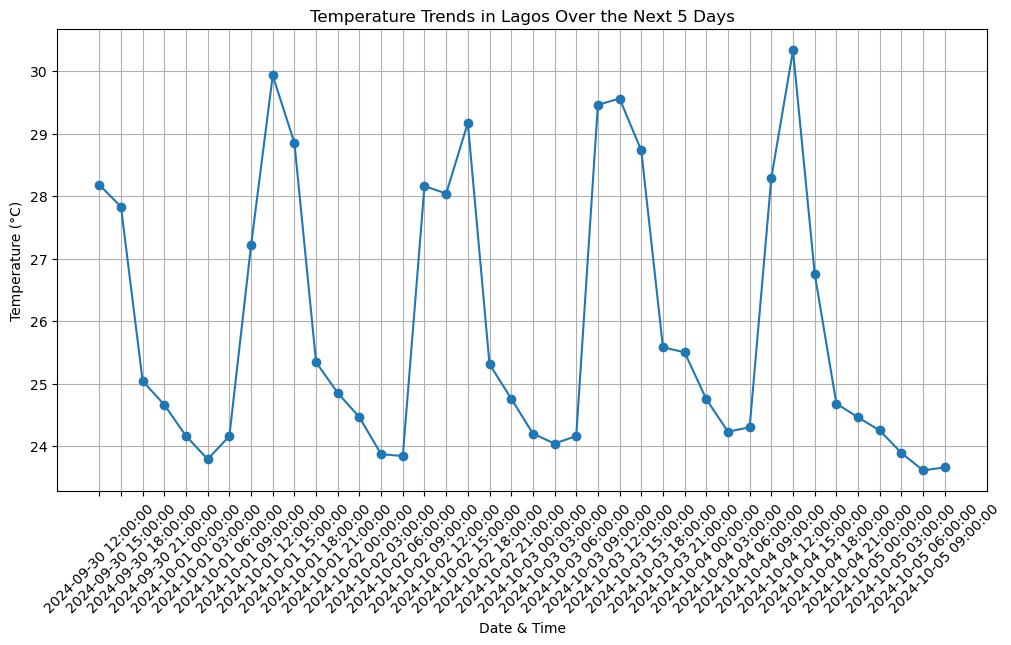

In [52]:
import matplotlib.pyplot as plt  # Import the plotting library

# Filter the DataFrame to get only the weather data for Lagos
lagos_forecast = df[df['City'] == 'Lagos']

# Create a new figure for the plot with a specified size (width=12, height=6)
plt.figure(figsize=(12, 6))

# Plot the temperature trend for Lagos over time, using the 'Date & Time' as the x-axis and 'Temperature (°C)' as the y-axis
# 'marker='o'' adds circle markers at each data point
plt.plot(lagos_forecast['Date & Time'], lagos_forecast['Temperature (°C)'], marker='o')

# Add a title to the plot
plt.title('Temperature Trends in Lagos Over the Next 5 Days')

# Label the x-axis (Date & Time) and the y-axis (Temperature in °C)
plt.xlabel('Date & Time')
plt.ylabel('Temperature (°C)')

# Rotate the x-axis labels (date and time) by 45 degrees for better readability
plt.xticks(rotation=45)

# Add a grid to the plot for easier visualization of the data points
plt.grid()

# Display the plot
plt.show()

In [ ]:
url = "https://icanhazdadjoke.com/"
headers = {"Accept": "text/plain"}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    print(response.text)
else:
    print("Failed to retrieve a joke")